In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="darkgrid")
import string
import nltk
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import json
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/realdonaldtrump.ndjson


In [2]:
data_url = '../input/realdonaldtrump.ndjson'
records = map(json.loads, open(data_url))
df = pd.DataFrame.from_records(records)

In [3]:
df.shape

(40241, 34)

In [4]:
df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,possibly_sensitive,extended_entities,quoted_status,quoted_status_id,quoted_status_id_str,retweeted_status,withheld_copyright,withheld_in_countries,withheld_scope,scopes
0,None,None,Mon May 04 18:54:25 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",850,False,None,1698308935,1698308935,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,Tue May 05 01:00:10 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",282,False,None,1701461182,1701461182,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,Fri May 08 13:38:08 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",16,False,None,1737479987,1737479987,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,Fri May 08 20:40:15 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",28,False,None,1741160716,1741160716,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,Tue May 12 14:07:28 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",1950,False,None,1773561338,1773561338,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df['source'].unique())

19

In [6]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'favorite_count', 'favorited', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'retrieved_utc', 'retweet_count', 'retweeted', 'source', 'text',
       'truncated', 'user', 'possibly_sensitive', 'extended_entities',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweeted_status', 'withheld_copyright', 'withheld_in_countries',
       'withheld_scope', 'scopes'],
      dtype='object')

In [7]:
df.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,retrieved_utc,retweet_count,quoted_status_id
count,40241.000000,4.024100e+04,2.393000e+03,2.873000e+03,4.024100e+04,40241.000000,6.420000e+02
mean,17699.030814,5.850965e+17,4.152022e+17,2.859287e+14,1.562867e+09,4956.459134,9.164181e+17
std,37034.338358,2.791762e+17,2.572739e+17,1.532587e+16,4.381571e+01,9655.247594,1.942676e+17
min,0.000000,1.698309e+09,1.288894e+17,7.425000e+03,1.562867e+09,0.000000,3.009181e+16
25%,21.000000,3.517832e+17,2.920414e+17,2.511377e+07,1.562867e+09,23.000000,7.118302e+17
50%,114.000000,5.534068e+17,3.151636e+17,1.727381e+08,1.562867e+09,246.000000,9.706234e+17
75%,9468.000000,7.619873e+17,3.651525e+17,4.518238e+08,1.562867e+09,6141.000000,1.097188e+18
max,576394.000000,1.149346e+18,1.149346e+18,8.214724e+17,1.562867e+09,321390.000000,1.149093e+18


In [8]:
df.isnull().sum()

contributors                 40241
coordinates                  37826
created_at                       0
entities                         0
favorite_count                   0
favorited                        0
geo                          37826
id                               0
id_str                           0
in_reply_to_screen_name      37368
in_reply_to_status_id        37848
in_reply_to_status_id_str    37848
in_reply_to_user_id          37368
in_reply_to_user_id_str      37368
is_quote_status                  0
lang                             0
place                        37250
retrieved_utc                    0
retweet_count                    0
retweeted                        0
source                           0
text                             0
truncated                        0
user                             0
possibly_sensitive           30818
extended_entities            38038
quoted_status                39747
quoted_status_id             39599
quoted_status_id_str

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])


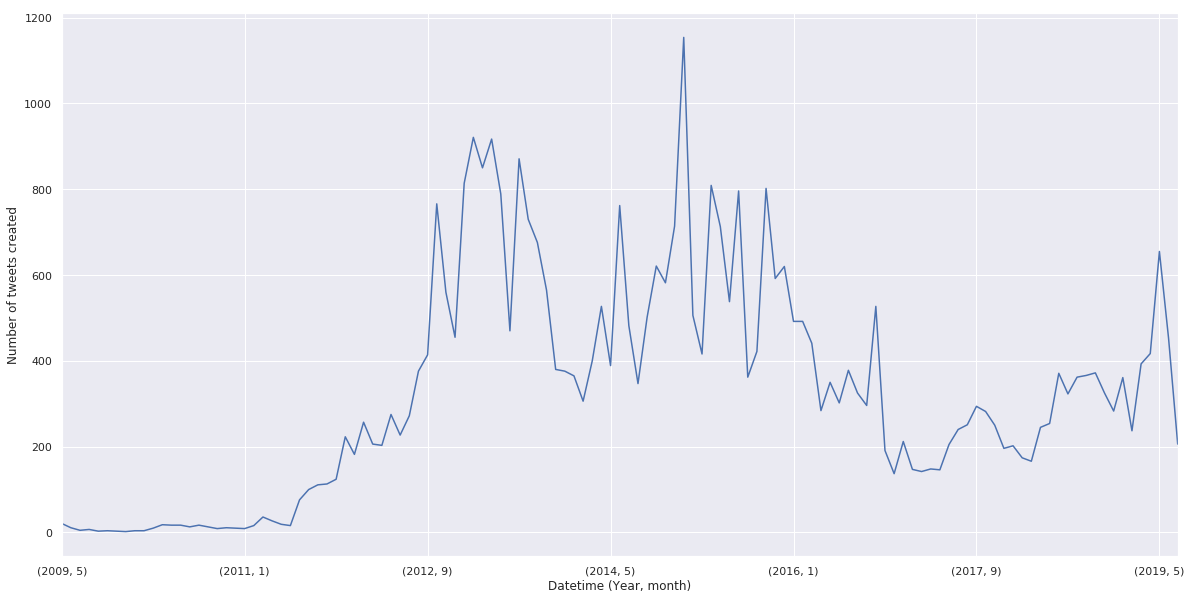

In [10]:
plt.figure(figsize=(20,10))
df.groupby([df['created_at'].dt.year, df['created_at'].dt.month])['created_at'].count().plot()
plt.xlabel('Datetime (Year, month)')
plt.ylabel('Number of tweets created')
plt.show()

In [11]:
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
tmp = df.groupby(['month', 'year']).count()
tmp

contributors  coordinates  created_at  entities  favorite_count  \
month year                                                                    
1     2010             0            0           4         4               4   
      2011             0            0           9         9               9   
      2012             0            0         182       182             182   
      2013             0            0         814       814             814   
      2014             0           32         365       365             365   
...                  ...          ...         ...       ...             ...   
12    2014             0          124         714       714             714   
      2015             0            0         620       620             620   
      2016             0            0         137       137             137   
      2017             0            0         196       196             196   
      2018             0            0         283       283             283   

            favorited  geo   id  id_str  in_reply_to_screen_name  ...  \
month year                                                        ...   
1     2010          4    0    4       4                        0  ...   
      2011          9    0    9       9                        0  ...   
      2012        182    0  182     182                        8  ...   
      2013        814    0  814     814                      386  ...   
      2014        365   32  365     365                       11  ...   
...               ...  ...  ...     ...                      ...  ...   
12    2014        714  124  714     714                        2  ...   
      2015        620    0  620     620                        4  ...   
      2016        137    0  137     137                        0  ...   
      2017        196    0  196     196                        2  ...   
      2018        283    0  283     283                       12  ...   

            possibly_sensitive  extended_entities  quoted_status  \
month year                                                         
1     2010                   0                  0              0   
      2011                   0                  0              0   
      2012                 111                  0              0   
      2013                  82                  2              0   
      2014                  43                  6              0   
...                        ...                ...            ...   
12    2014                 137                 21              0   
      2015                 189                 98              8   
      2016                  36                  8              0   
      2017                  79                 20             10   
      2018                  28                 13              2   

            quoted_status_id  quoted_status_id_str  retweeted_status  \
month year                                                             
1     2010                 0                     0                 0   
      2011                 0                     0                 0   
      2012                 0                     0                 0   
      2013                 0                     0                 0   
      2014                 0                     0                 0   
...                      ...                   ...               ...   
12    2014                 0                     0                 0   
      2015                 8                     8                 0   
      2016                 0                     0                 6   
      2017                12                    12                23   
      2018                 3                     3                12   

            withheld_copyright  withheld_in_countries  withheld_scope  scopes  
month year                                                                     
1     2010                   0                      

/opt/conda/lib/python3.6/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


<Figure size 1440x1440 with 0 Axes>

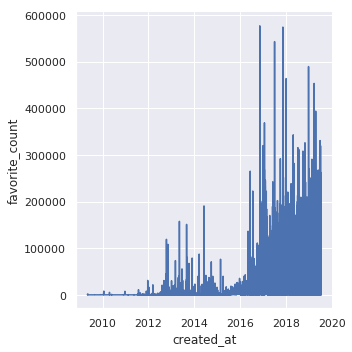

In [12]:
plt.figure(figsize=(20,20))
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.relplot( 'created_at', 'favorite_count',kind="line",data=df)

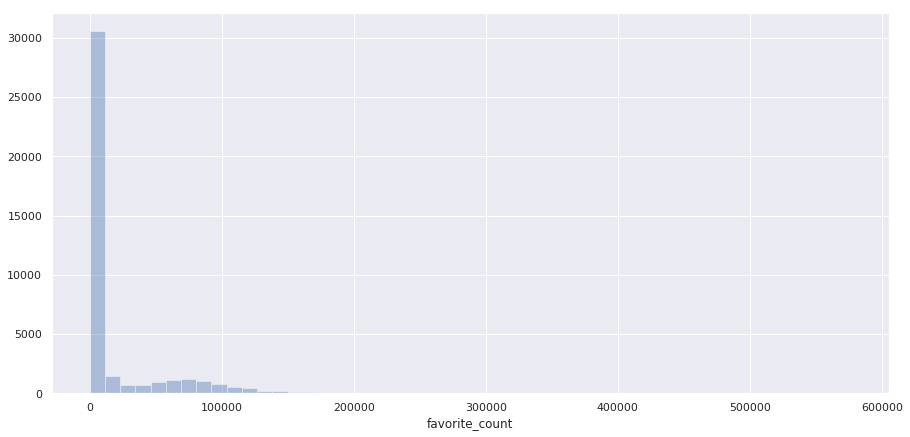

In [13]:
plt.figure(figsize=(15,7))
sns.distplot(df['favorite_count'], kde=False)

In [14]:
print("Maximum favourite count is {}.".format(df['favorite_count'].max()))
df.iloc[df['favorite_count'].idxmax()].text

Maximum favourite count is 576394.


'Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before'

In [15]:
df['entities'].astype('str').unique()

array(["{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}",
       "{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': [{'id': 52544275, 'id_str': '52544275', 'indices': [46, 58], 'name': 'Ivanka Trump', 'screen_name': 'IvankaTrump'}]}",
       "{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': [{'id': 18456892, 'id_str': '18456892', 'indices': [17, 30], 'name': 'Bret Michaels', 'screen_name': 'bretmichaels'}, {'id': 30274144, 'id_str': '30274144', 'indices': [34, 46], 'name': 'Holly🌸Robinson🌸Peete', 'screen_name': 'hollyrpeete'}]}",
       ...,
       "{'hashtags': [], 'symbols': [], 'urls': [{'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1149345680189722630', 'indices': [116, 139], 'url': 'https://t.co/Xu0117O2p8'}], 'user_mentions': []}",
       "{'hashtags': [], 'symbols': [], 'urls': [{'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1149345681829744

Work on Date time tweet


In [16]:
df['source'].iloc[:5]

0    <a href="http://twitter.com" rel="nofollow">Tw...
1    <a href="http://twitter.com" rel="nofollow">Tw...
2    <a href="http://twitter.com" rel="nofollow">Tw...
3    <a href="http://twitter.com" rel="nofollow">Tw...
4    <a href="http://twitter.com" rel="nofollow">Tw...
Name: source, dtype: object

In [17]:
import re
df['source'] = df['source'].str.replace(r'<[^<]+?>','')
df['source'].unique()

array(['Twitter Web Client', 'TwitLonger Beta', 'TweetDeck', 'Facebook',
       'Twitter for iPhone', 'Twitter Web App', 'Twitter for Android',
       'Instagram', 'Twitlonger', 'Vine - Make a Scene',
       'Twitter for Websites', 'Twitter for BlackBerry',
       'Neatly For BlackBerry 10', 'Periscope', 'Twitter QandA',
       'Twitter Mirror for iPad', 'Twitter Ads', 'Twitter for iPad',
       'Twitter Media Studio'], dtype=object)

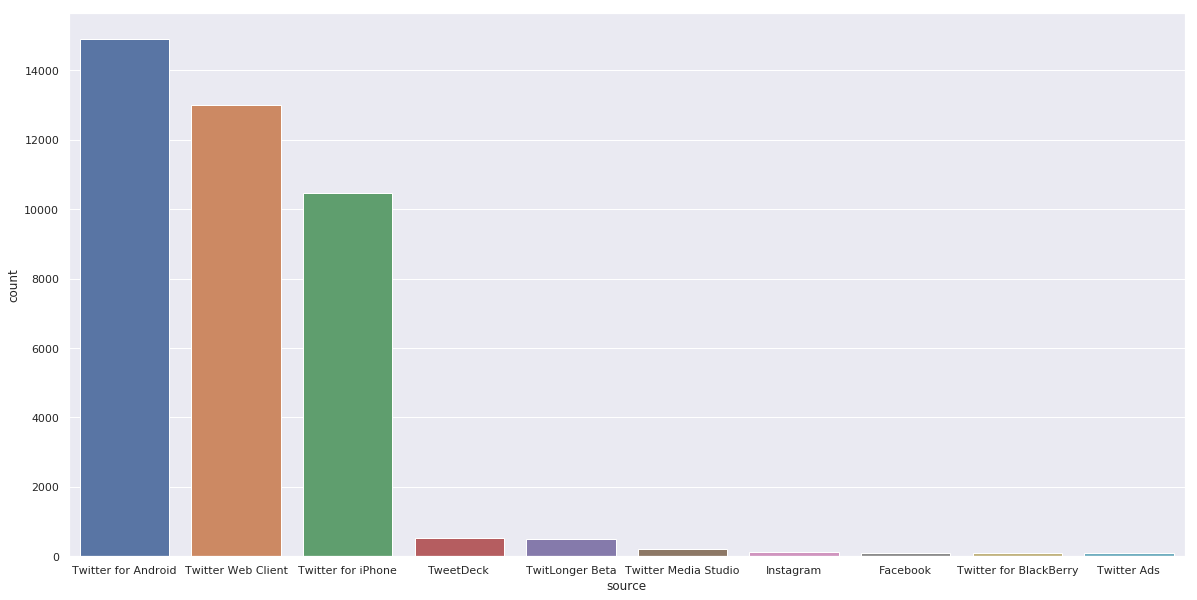

In [18]:
plt.figure(figsize=(20,10))
sns.countplot('source',data=df, order=df['source'].value_counts().iloc[:10].index)

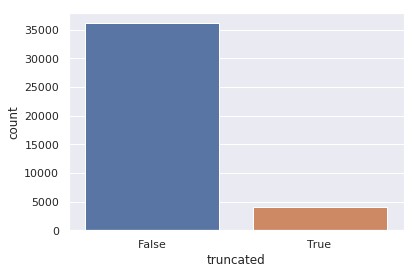

In [19]:

ax = sns.countplot(x="truncated",data=df)

In [20]:
list(df[df['truncated'] == True].iloc[:7].text.values)

['Thank you High Point, NC! I will fight for every neglected part of this nation &amp; I will fight to bring us together… https://t.co/DSaUpSptBz',
 'Thank you Kenansville, North Carolina! Remember- on November 8th, that special interest gravy train is coming to a… https://t.co/AysJRMzvKw',
 'It is a MOVEMENT - not a campaign. Leaving the past behind, changing our future. Together, we will MAKE AMERICA SAF… https://t.co/Lt2L3NKzyi',
 'Thank you Toledo, Ohio! It is so important for you to get out and VOTE on November 8, 2016! Lets MAKE AMERICA SAFE… https://t.co/MQdp4GgLIE',
 'Great new polls! Thank you Nevada, North Carolina &amp; Ohio. Join the MOVEMENT today &amp; lets #MAGA!… https://t.co/Y8Sb8MNyXA',
 "Tomorrow's the day! Knock on doors and make calls with us on National Day of Action! #TrumpTrain #MAGA… https://t.co/05NY0wJHkL",
 'Join me in Roanoke, Virginia tomorrow at the Berglund Center- Coliseum ~ 6pm! Tickets available at:… https://t.co/bnEE6NX41Z']

In [21]:
list(df[df['truncated'] == True].iloc[:7].text.values)[5]

"Tomorrow's the day! Knock on doors and make calls with us on National Day of Action! #TrumpTrain #MAGA… https://t.co/05NY0wJHkL"

In [22]:
df = df[df['truncated'] == False]

In [23]:
text = list(df['text'].values)

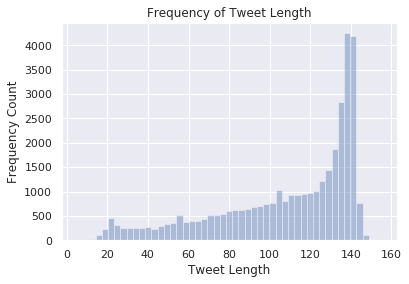

In [24]:
ax = sns.distplot([len(tweet) for tweet in text], kde=False)
ax.set_title('Frequency of Tweet Length')
ax.set_xlabel('Tweet Length')
ax.set_ylabel('Frequency Count')
plt.show()

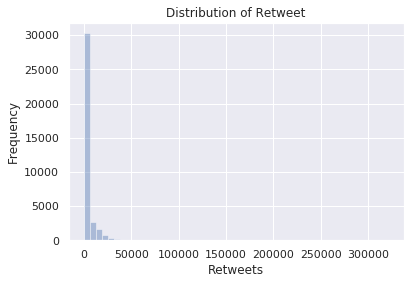

In [25]:
ax = sns.distplot(df['retweet_count'], kde=False)
ax.set_title('Distribution of Retweet')
ax.set_xlabel('Retweets')
ax.set_ylabel('Frequency')
plt.show()

In [26]:
from nltk.tokenize import word_tokenize
hashtags = []
parse_tweets = []
for tweet in text:
    hashtags += [i for i in tweet.split() if i.startswith("#") ]
    parse_tweets.append(word_tokenize(tweet))

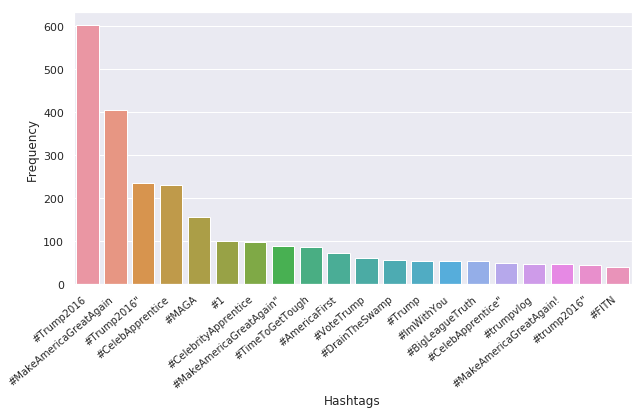

In [27]:
from collections import Counter
c = Counter(hashtags)

val = []
hashname = []
for idx,i in enumerate(c.most_common(20)):
    val.append(i[1])
    hashname.append(i[0])
plt.figure(figsize=(10,5))
sns.barplot(x=hashname, y=val)
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=40, horizontalalignment='right', fontsize=10)
plt.show()